<a href="https://colab.research.google.com/github/Kat-ies/NAM_bsu/blob/main/5%20sem/lab%201/NA_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Лабораторная работа 1**
## Теоретический материал  

Для реализации явного метода Эйлера будем использовать следующие формулы:  
  
 \begin{equation*}
  \begin{cases}
   x_{i} = x_{i-1} + h
   \\
   f(x_{i}, y_{i}) = y^\prime(x_{i})
   \\
   y_{i} = y_{i-1} + hf(x_{i-1},y_{i-1})
   \\
   i = \overline{1,n}
  \end{cases}
\end{equation*}

Второй метод будет представлен в виде:

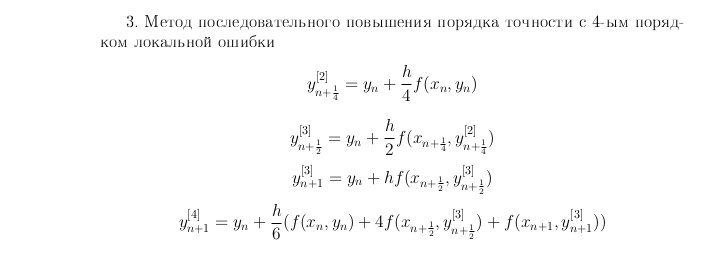

Для автоматического выбора шага будем использовать теоретический материал из файла [odeSolveStepSizeSelection.pdf](https://www.dropbox.com/sh/sjzi7ia6f2qvi11/AABnpXNR-WHwiE9yPHPmrfyga?dl=0&preview=odeSolveStepSizeSelection.pdf)

Методы выше нужны для решения ОДУ второго порядка:
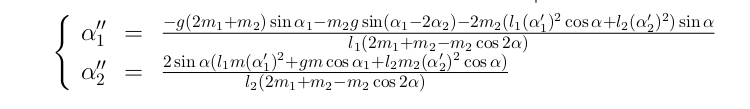

Для решения задачи сведём исходную систему ДУ к системе ДУ первого порядка:
\begin{equation*} 
  \begin{cases}
   u_{1} = \alpha^\prime_{1}
   \\
   u_{2} = \alpha^\prime_{2}
   \\
   u_{1}^{\prime} = f_{1}(u_{1},u_{2})
   \\
   u_{2}^{\prime} = f_{2}(u_{1},u_{2})
  \end{cases}
\end{equation*}
$\alpha_{1}(0) = \pi/9$ , $\alpha_{2}(0) = \pi/6$,  
$\alpha_{1}^\prime(0) = 0$, $\alpha_{2}^\prime(0) = 0$

In [201]:
#подключим всё, что нужно и инициализируем все параметры
import time
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
tol = 1e-6
h_0 = 0.1
p_for_euler = 1
p_for_my_method = 4

A = 0
B = 3
#все величины в системе СИ
l1 = 0.2
l2 = 0.2
m1 = 3
m2 = 0.3
g = 9.8
alpha_1 = np.pi/9
alpha_2 = np.pi/6
y_0 = np.array([alpha_1, alpha_2, 0, 0], dtype = 'float64')
coef = 0.8


In [196]:
 #
def f(alpha_1, alpha_2, u_1, u_2):

    return np.array([u_1, u_2, (-g*(2*m1 + m2) * np.sin(alpha_1) - m2 * g * np.sin(alpha_1 - 2*alpha_2)
    - 2*m2*(l1 * u_1**2 * np.cos(alpha_1 - alpha_2) + l2 * u_2**2) * np.sin(alpha_1 - alpha_2))/
    (l1 * (2*m1 + m2 - m2 *  np.cos(2*(alpha_1 - alpha_2)))),

    (2 * np.sin(alpha_1 - alpha_2) * (l1 * (m1 + m2) * u_1**2 + g * (m1 + m2) * np.cos(alpha_1)) + l2 * m2 * u_2**2 * np.cos(alpha_1 - alpha_2))/
    (l2 * (2*m1 + m2 - m2 *  np.cos(2*(alpha_1 - alpha_2))))])


In [197]:
def iteration(method,y_i, y, h, num_of_steps):
    y_i.append(y)
    for i in range(num_of_steps):
        y = method(y, h)
        y_i.append(y)
        #print(i)
        #print(y)
    return y


def euler(y, h):
    return y + h * f(*y.tolist())

def my_method(y, h):
    y_2 = y + h/4 * f(*y.tolist())
    y_3_1 = y + h/2 * f(*y_2.tolist())
    y_3 = y + h * f(*y_3_1.tolist())
    return y + h/6 * (f(*y.tolist()) + 4 * f(*y_3_1.tolist()) + f(*y_3.tolist()))

In [198]:
#автоматический выбор шага
def select_step_size(method, p, h,y_i):
    count = 0
    y = np.array(y_0)
    err = 1

    while err > tol:
        y_2h = iteration(method,y_i, y, 2 * h,1)
        y_h = iteration(method,y_i, y, h, 2)
        err = np.abs(np.linalg.norm(y_h - y_2h) / (2 ** p - 1))
        count += 1
        if err > tol:
            delta = (tol / err) ** (1.0 / (p + 1))
            h_new = coef * delta * h
            if delta < 1:
                h = h_new
            else:
                y = y_2h
                h = min(h_new, (B - A - 2 * h) / 2)
    return h, count

In [222]:
#построение графика
def plot(y_i, title):
    x1, x2, y1, y2 = [], [], [], []
       
    for numbers in y_i:
        x1.append(l1 * np.sin(numbers[0]))
        y1.append(-l1 * np.cos(numbers[0]))
        x2.append(x1[-1] + l2 * np.sin(numbers[1]))
        y2.append(y1[-1] - l2 * np.cos(numbers[1]))
    plt.figure(figsize=(5, 5))
    plt.title(title, fontsize=14, fontname='Times New Roman')
    plt.xlabel('x',fontsize=12, fontname='Times New Roman')
    plt.ylabel('y',fontsize=12, fontname='Times New Roman')
    plt.plot(0,0, linestyle=':')
    plt.plot(x1,y1, color='#fb607f', linestyle='-')
    plt.plot(x2,y2, color='#906bff', linestyle='-')
    plt.show()

# Основная часть

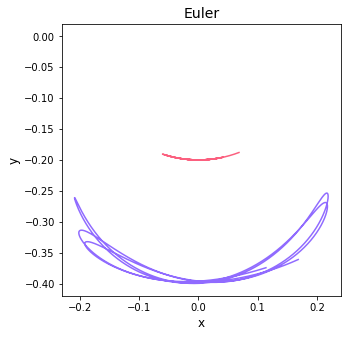

h:  0.00018463335391208266


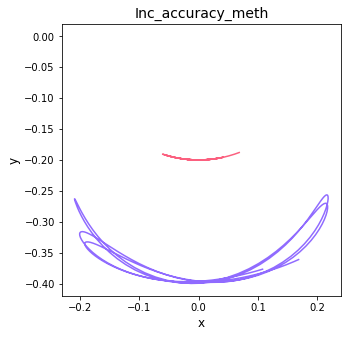

h:  0.012163599413762126


In [225]:
categories = ['Euler', 'Inc_accuracy_meth']
cols = ['N', 'N_a', 'N_r', 'time']
p = [p_for_euler, p_for_my_method]
table_df = pd.DataFrame(index = categories, columns = cols)

methods = [euler, my_method]

for i, meth in enumerate(methods):
    y_i = []
    t0 = time.time()
    h, N = select_step_size(meth, p[i], h_0, y_i)
    n = int((B - A) / h)
    y_i.clear()
    y_n = iteration(meth, y_i, np.array(y_0, dtype = 'float64'), h, n)
    t = time.time()

    table_df.loc[categories[i]] = (n, N, n-N, t-t0)
    plot(y_i, categories[i])

    print('h: ', h)

#Результаты

In [226]:
table_df[:]

,N,N_a,N_r,time
Euler,16248,2,16246,0.326361
Inc_accuracy_meth,246,2,244,0.0354257
